# NSC HW2

## Kai Malcolm
## NSC 3270
## Due 9/14/21 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


## Part a) Logistic/Sigmoidal Function

In [3]:
test = np.array([1,2,3])
print(type(test))
print(len(test))

test**2
1 + test
1/test
np.exp(test)


<class 'numpy.ndarray'>
3


array([ 2.71828183,  7.3890561 , 20.08553692])

In [4]:
#alpha(n) = 1 / (1 + exp(-n))

#One of the functions should use a for loop to fill in values of a(n). 
def alpha_for(n):
    res = [0]*len(n)
    for idx, val in enumerate(n):
        res[idx] = 1 / (1 + np.exp(-val))
    return res


#The other function should use “vectorized” operations (without a for loop) to fill in values of a(n).
def alpha_vec(n):
    return 1 / (1 + np.exp((-1)*np.array(n)))


## Part b) Basic Relu Function

In [5]:
def relu_for(n):
    res = [0]*len(n)
    for idx, val in enumerate(n):
        res[idx] = val if val > 0 else 0
    return res


def relu_vec(n):
    return [val if val > 0 else 0 for val in n]


## Part c) Plotting

In [6]:
def plot_me(n,func,my_label,my_title="Descriptive Title",legend_loc="lower right"):
    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(8, 6))

    # Draw all the lines in the same plot, assigning a label for each one
    ax.plot(n, func(n), color="red", label=my_label)

    # Labels
    plt.title(my_title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(loc=legend_loc, frameon=False)

    plt.show()
    

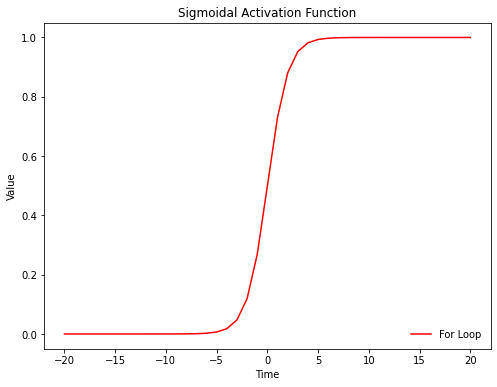

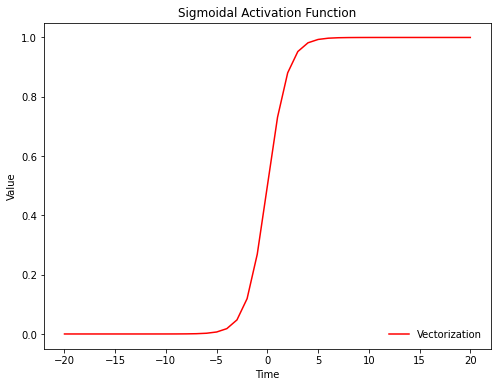

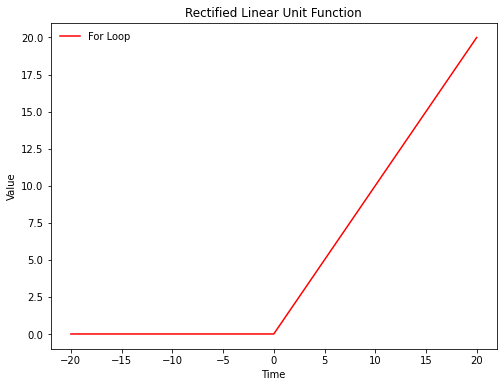

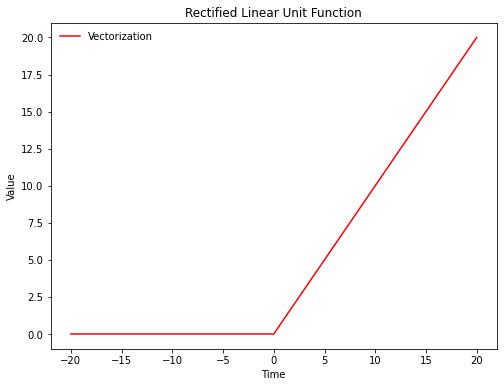

In [8]:
n = np.arange(-20,21)

plot_me(n, alpha_for, "For Loop", "Sigmoidal Activation Function")
plot_me(n, alpha_vec, "Vectorization", "Sigmoidal Activation Function")
plot_me(n, relu_for, "For Loop", "Rectified Linear Unit Function", legend_loc="upper left")
plot_me(n, relu_vec, "Vectorization", "Rectified Linear Unit Function", legend_loc="upper left")


## Part d) _n = wx + b_